<a href="https://colab.research.google.com/github/vkumar61/MAT421/blob/main/Module_H_Section_22_1%2C_22_2%2C_22_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numerical ODEs
In the world of differential equations, we encounter two main types: ordinary (ODEs) and partial (PDEs). ODEs deal with functions and their derivatives in a single dimension, while PDEs extend to multiple dimensions. Solving these equations can be tough, and many times impossible analytically, for very similar reasons as discussed in integration. Then add the complexity of various types of initial values that scale with the number of derivatives and are necassary to find specific solutions. All of this just to say ODEs are complicated and annoying, let's explore some numerical methods that can make this easier.

### Reduction of Order

The concept of "Reduction of Order" is a technique used in numerical methods to solve higher-order ordinary differential equations (ODEs) by converting them into systems of first-order ODEs. This technique involves defining a vector, S(t), comprising all relevant dependent variables and their derivatives. By doing so, the original higher-order ODE can be transformed into a system of first-order ODEs. This system is coupled, meaning the equations share the same terms, and can be represented in matrix form for linear ODEs. Despite the increase in the number of variables, all derivatives are still taken with respect to the same independent variable, preserving the essential nature of the original differential equation.

### Euler Methods

The explicit Euler method is a numerical technique for approximating solutions to ordinary differential equations (ODEs). It approximates the derivative of a function at each time step using a forward difference formula:

$$ \frac{dy}{dt} \approx \frac{y_{n+1} - y_n}{h} $$

where $ y_n $ represents the approximate value of $ y $ at time $ t_n $, and $ h $ is the step size.

Using this approximation in the ODE $ \frac{dy}{dt} = f(t, y) $, we get:

$$ \frac{y_{n+1} - y_n}{h} = f(t_n, y_n) $$

Solving for $ y_{n+1} $, we obtain the explicit Euler formula:

$$ y_{n+1} = y_n + hf(t_n, y_n) $$

The implicit Euler method, on the other hand, involves approximating the ODE value at the next time step based on the current step:

$$ y_{n+1} = y_{n} + hf(t_{n+1}, y_{n+1}) $$

To improve accuracy, a modified version can be used, similar to midpoint integration, by approximating the ODE "slope" as the average of the implicit and explicit values. This is called trapezoidal Rule:

$$ y_{n+1} = y_{n} + \frac{h}{2}(f(t_{n+1}, y_{n+1}) + f(t_n, y_n))$$

We compare the three methods below for $y' = -yt$:

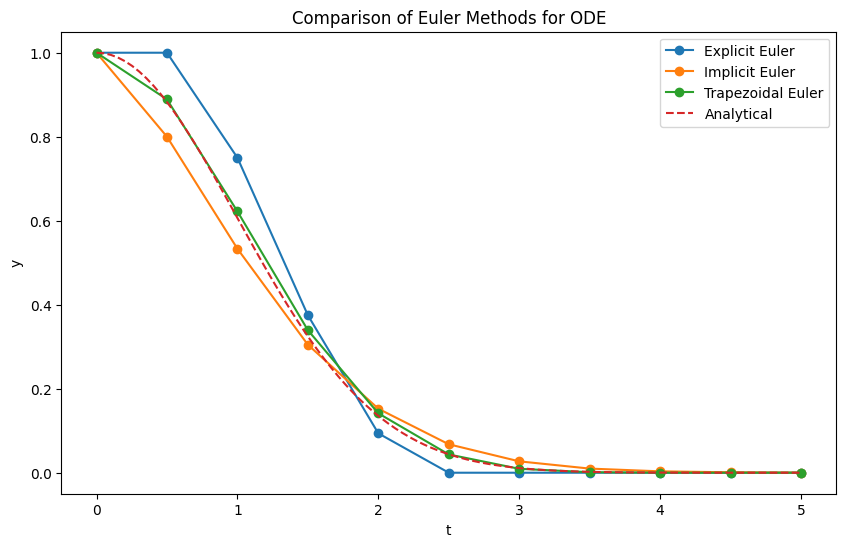

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
y0 = 1.0
t0 = 0.0
tn = 5.0
h = 0.5
num_steps = int((tn - t0) / h)

# Preallocate arrays
t_values = np.linspace(t0, tn, num_steps + 1)
y_explicit = np.zeros(num_steps + 1)
y_implicit = np.zeros(num_steps + 1)
y_midpoint = np.zeros(num_steps + 1)
y_explicit[0] = y0
y_implicit[0] = y0
y_midpoint[0] = y0

# Define the ODE
def f(t, y):
    return -y*t

# Explicit Euler method
for i in range(num_steps):
    y_explicit[i+1] = y_explicit[i] + h * f(t_values[i], y_explicit[i])

# Implicit Euler
for i in range(num_steps):
    y_implicit[i+1] = y_implicit[i]/(1+h*t_values[i+1])

# Trapeziodal Euler
for i in range(num_steps):
    y_midpoint[i+1] = (y_midpoint[i] + (h/2) * f(t_values[i], y_midpoint[i]))/(1+(h/2)*t_values[i+1])

# Analytical solution for comparison
t_analytical = np.linspace(t0, tn, 100)
y_analytical_values = np.exp(-0.5*t_analytical**2)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_explicit, label='Explicit Euler', marker='o')
plt.plot(t_values, y_implicit, label='Implicit Euler', marker='o')
plt.plot(t_values, y_midpoint, label='Trapezoidal Euler', marker='o')
plt.plot(t_analytical, y_analytical_values, label='Analytical', linestyle='--')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparison of Euler Methods for ODE')
plt.legend()